<a href="https://colab.research.google.com/github/alessandrobruni/TensorflowChurn/blob/main/Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick recap on Churn

* Churn occurs when a customer or an employee leaves a company.
So this is particularly important in business because it's a lot more
expensive to attract a new customer than it is to retain an existing one, so
companies around the world try to minimize churn so that they can stop losing customers and effectively improve their bottom line* Churn accours whn a client or employee leaves a company
* Churn can pedicted using a machine learning tecnique called binary classification


In this case I will use Tensorflow to predict if whether or not a customare will chur.

Here is a CSV data set that has some historical data on customers that have churned. Download the dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

pd.options.display.max_columns= 500
df = pd.read_csv('Churn.csv')
df.head()


,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


The dataset contains a ot of feature, and on the far right hand side we've actually got a column titled churn where  
* **no** means that they're still with our business so they've been retained
* **yes**  basically means that our customer has left the business  


The we create X dataset with all the feature to look for prediction and a y with the value to perdict (churn)


In [3]:
X = pd.get_dummies(df.drop(["Churn","Customer ID"], axis= 1)) #cobvert catehorical variables in dummy variable to let them digestable by the algo
X.head(5)

,Senior Citizen,tenure,Monthly Charges,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Total Charges_,Total Charges_100.2,Total Charges_100.25,Total Charges_100.35,Total Charges_100.4,Total Charges_100.8,Total Charges_100.9,Total Charges_1001.2,Total Charges_1001.5,Total Charges_1003.05,Total Charges_1004.35,Total Charges_1004.5,Total Charges_1004.75,Total Charges_1005.7,Total Charges_1006.9,Total Charges_1007.8,Total Charges_1007.9,Total Charges_1008.55,Total Charges_1008.7,Total Charges_1009.25,Total Charges_101.1,Total Charges_101.45,Total Charges_101.65,Total Charges_101.9,Total Charges_1010,Total Charges_1011.05,Total Charges_1011.5,Total Charges_1011.8,Total Charges_1012.4,Total Charges_1013.05,Total Charges_1013.2,Total Charges_1013.35,Total Charges_1013.6,Total Charges_1014.25,Total Charges_1016.7,Total Charges_1017.35,Total Charges_102.45,Total Charges_102.5,Total Charges_102.75,Total Charges_1020.2,Total Charges_1020.75,Total Charges_1021.55,Total Charges_1021.75,Total Charges_1021.8,Total Charges_1022.5,Total Charges_1022.6,Total Charges_1022.95,Total Charges_1023.75,Total Charges_1023.85,Total Charges_1023.9,Total Charges_1023.95,Total Charges_1024,Total Charges_1024.65,Total Charges_1024.7,Total Charges_1025.05,Total Charges_1025.15,Total Charges_1025.95,Total Charges_1026.35,Total Charges_1027.25,Total Charges_1028.75,Total Charges_1028.9,Total Charges_1029.35,Total Charges_1029.75,Total Charges_1029.8,Total Charges_103.7,Total Charges_1031.1,Total Charges_1031.4,Total Charges_1031.7,Total Charges_1032,Total Charges_1032.05,Total Charges_1033,Total Charges_1033.9,Total Charges_1033.95,Total Charges_1035.5,Total Charges_1035.7,Total Charges_1036,Total Charges_1036.75,Total Charges_1037.75,Total Charges_1039.45,Total Charges_104.2,Total Charges_104.3,Total Charges_1041.8,Total Charges_1042.65,Total Charges_1043.3,Total Charges_1043.35,Total Charges_1043.4,Total Charges_1043.8,Total Charges_1045.25,Total Charges_1046.1,Total Charges_1046.2,Total Charges_1046.5,Total Charges_1047.7,Total Charges_1048.45,Total Charges_1048.85,Total Charges_1049.05,Total Charges_1049.6,Total Charges_105.5,Total Charges_105.6,Total Charges_1050.5,Total Charges_1051.05,Total Charges_1051.9,Total Charges_1052.35,Total Charges_1052.4,Total Charges_1054.6,Total Charges_1054.75,Total Charges_1054.8,Total Charges_1055.9,Total Charges_1056.95,Total Charges_1057,Total Charges_1057.55,Total Charges_1057.85,Total Charges_1058.1,Total Charges_1058.25,Total Charges_1058.6,Total Charges_1059.55,Total Charges_106.2,Total Charges_106.55,Total Charges_106.8,Total Charges_106.85,Total Charges_106.9,Total Charges_1060.2,Total Charges_1060.6,Total Charges_1061.6,Total Charges_1062.1,Total Charges_1064.65,Total Charges_1064.95,Total Charges_1066.15,Total Charges_1066.9,Total Charges_1067.05,Total Charges_1067.15,Total Charges_1067.65,Total Charges_1068.15,Total Charges_1068.85,Total Charges_107.05,Total Charges_107.1,Total Charges_107.25,Total Charges_107.6,Total Charges_1070.15,Total Charges_1070.25,Total Charges_1070.5,Total Charges_1070.7,Total Charges_1071.4,Total Charges_1071.6,Total Ch

In [14]:
y = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0) #same reason as before burbeefore, simplify categories
len(y), len(X)

(7044, 7044)

0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) #Split arrays or matrices into random train and test subsets - function from sklearn
display(X_train.shape)
display(y_train.shape)

(5635, 6575)

(5635,)

# Import dependencies

Now let's put our fee into Tensorflow.
Staring import dependencies

In [5]:
# sequencial module will be our core model class , load_model will allow as to reload model from  memory later on
from tensorflow.keras.models import Sequential, load_model 
# Dense is going to be a fully connected layer inside of our neural network 
# so it's going to allow us to build a whole bunch of hidden layers
# it cam be imported ayer also optimized fro images, natural languages, (Conv2D, LSTM)
from tensorflow.keras.layers import Dense 
# accuracy score so our accuracy
# score is going to be the metric that we
# use to evaluate how well our model is performing
from sklearn.metrics import accuracy_score 

# Build Model




In [20]:
#instantiating our sequential class
model = Sequential()
# insied this dense layer will set 32 neurons 
#by passing through a relu activation function converting the output to a minimum of zero and then an unlimited upward value 
# input dim is going to be the same numbern of dimensions that are available inside of our feature data frame
model.add(Dense( units = 32, activation='relu', input_dim = len(X_train.columns)))
model.add(Dense( units = 64, activation= 'relu' ))
#the number of units in the last layer indicates what the output look like. In our case yes/no (1/0)
#One unit will mean that we only get one number back, sophistocated models for othe task often have mutiple units in the final layer
model.add(Dense(units=1, activation='sigmoid'))
# in this case really what we're trying to do is predict yes or no whether or not a client has
# churned and then we specify the activation of sigmoid so this is going to take the
# output of our previous layer and the output of this layer and convert it to a
# value between one or zero so one representing yes they have turned zero representing no they haven't turned


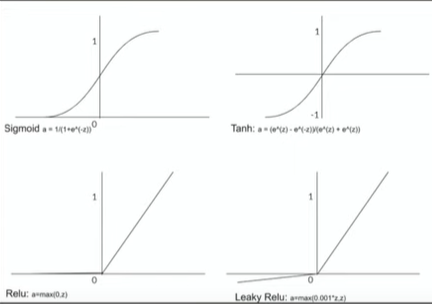

# Compile the Model 
Best way to explain this is think about a game of battleship 
 * loss is basically the sum of how far our estimations are from sinking a battleship 
 *  optimizer is how we choose to search through and find those battleships:  
  basically we might choose to use a grid pattern or we might choose to use a random, so basically our optimizer is getting us closer to our end outcome and ideally helping us reduce our loss
 * metrics allow us to evaluate how well our model is performing


In [23]:
model.compile(loss= 'binary_crossentropy', optimizer='sgd', metrics='accuracy')

# Fit, Predict and Evaluate

Model trained for long time (epoch) will often result in a more accurate  
model but might lead to overfitting .

In [24]:
model.fit(X_train, y_train, epochs=200, batch_size= 12 ) #X_train are the feature, y__train are the target

Epoch 1/200
470/470 [==============================] - 2s 4ms/step - loss: 0.5021 - accuracy: 0.7613
Epoch 2/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4802 - accuracy: 0.7783
Epoch 3/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4734 - accuracy: 0.7780
Epoch 4/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4691 - accuracy: 0.7792
Epoch 5/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4641 - accuracy: 0.7823
Epoch 6/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4621 - accuracy: 0.7826
Epoch 7/200
470/470 [==============================] - 2s 3ms/step - loss: 0.4624 - accuracy: 0.7796
Epoch 8/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4605 - accuracy: 0.7849
Epoch 9/200
470/470 [==============================] - 2s 4ms/step - loss: 0.4582 - accuracy: 0.7851
Epoch 10/200
470/470 [==============================] - 2s 3ms/step - loss: 0.4584 - accura

Afte finiseh trainig the model the result out of tensorflow it's going to
be a continuous value between 0 and 1. 
So what we want to do is convert this to a binary outcome so 0
or 1.,  what done in the next line is written a list comprehension
basically doing is setting our output or our outcome to 0
if the value is less than 0.5 or 1,  if it's above that
so it's the opposite side.

In [25]:
y_pr = model.predict(X_test)
y_predicted = [ 0 if a < 0.5 else 1 for a in y_pr]

45/45 [==============================] - 0s 3ms/step


In [29]:
print(y_predicted )

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 

In [30]:
accuracy_score(y_test, y_predicted)

0.7828246983676366

In this case is not too well, this mean tha is possible to improve it, for example trainig epoch to 500 this accuranci may grow. 

# Saving and Reloading

The last thing that we want to do with tensorflow is
save our model and be able to reload it from memory later

In [31]:
model.save('tfmodel') #model asaved in this folder

In [ ]:
#try to delete

In [32]:
del model

In [ ]:
#reolad model

In [33]:
model = load_model('tfmodel')